In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [ ]:
driver = webdriver.Chrome("/Users/KIIT/Desktop/chromedriver")

In [ ]:
All_Title = []
Company = []
Location = []

In [ ]:
for i in range(0, 100, 10):
    url = "https://www.indeed.co.in/jobs?q=artificial+intelligence&l=india&start={}".format(i)
    driver.get(url)
    all_jobs = driver.find_elements_by_class_name("result")
    for job in all_jobs:
        job_html = BeautifulSoup(job.get_attribute("innerHTML"), 'html.parser')
        Title = ""
        try:
            title = job_html.find("a", class_ = "jobtitle").text.replace("\n", "")
            Title = title
        except:
            Title = None
            
        
        Loc = ""
        try:
            loc = job_html.find(class_ = "location").text.replace("\n", "")
            Loc = loc
        except:
            Loc = None
            
            
        Com = ""
        try:
            com = job_html.find(class_ = "company").text.replace("\n", "")
            Com = com
        except:
            Loc = None
            
        
        All_Title.append(Title)
        Company.append(Com)
        Location.append(Loc)
        
        print(i)
            

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90


### Data Store in CSV File

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    "Title":All_Title,
    "Company":Company,
    "Location":Location
})

In [ ]:
df.to_csv("MachineLearningJobs.csv")

## Data Analysis...

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("machinelearning.csv")
df2 = pd.read_csv("ai.csv")
df3 = pd.read_csv("data_analyst.csv")
df4 = pd.read_csv("datascience2.csv")

In [ ]:
df = pd.concat([df1, df2, df3, df4], axis=0).drop_duplicates()

In [ ]:
df.shape

(1085, 7)

In [ ]:
df.keys()

Index(['Title', 'Location', 'Company', 'Salary', 'Sponsored', 'Description',
       'Unnamed: 0'],
      dtype='object')

In [ ]:
df.Sponsored.unique()

array(['Sponsored', 'Organic', 'sponsored', nan], dtype=object)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
g = df.groupby("Company")
value = g.count()["Title"].sort_values(ascending = False)[:15]

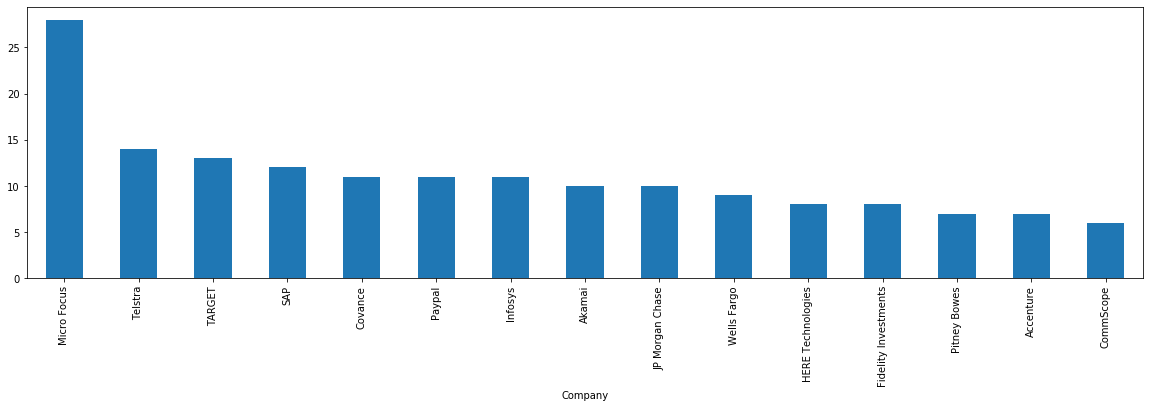

In [ ]:
value.plot(kind = "bar", figsize = (20, 5))
plt.show()

In [ ]:
## Text Processing

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [ ]:
def CleanData(Desc):
    des = word_tokenize(str(Desc))
    data = []
    for word in des:
        lower = word.lower()
        if lower not in stop_words:
            data.append(lower)

    return data
        

In [ ]:
tags_of_df = df["Description"].apply(CleanData)

In [ ]:
from collections import Counter
result = tags_of_df.apply(Counter).sum().items()

In [ ]:
Result = sorted(result, key = lambda kv: kv[1], reverse = True)

In [ ]:
result_series = pd.Series({
    k:v for k, v in Result
})

In [ ]:
result_series

,             23692
.             13728
data           5659
:              5065
experience     3789
              ...  
ue                1
simulator         1
vsa               1
vsg               1
netwrok           1
Length: 14937, dtype: int64

In [ ]:
skills = ["python", "math", "machine", "deep"]

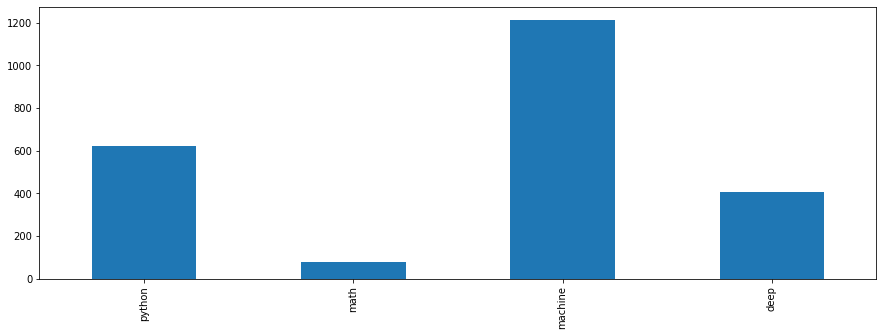

In [ ]:
Filter = result_series.filter(items=skills)
Filter.plot(kind = "bar", figsize = (15,5))
plt.show()

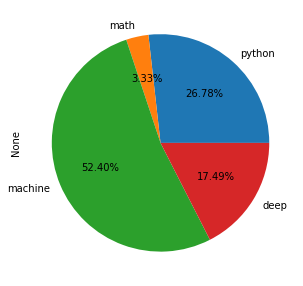

In [ ]:
Filter = result_series.filter(items=skills)
Filter.plot(kind = "pie", figsize = (20,5), autopct = "%.2f%%")
plt.show()